# EXPLORATORY DATA ANALYSIS

In [1]:
# Importing required packages
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
pd.options.display.float_format = "{: .2f}".format

import warnings
warnings.filterwarnings('ignore')


### Reading the Input Loan dataset

In [2]:
loan_df = pd.read_csv("loan.csv") 

In [3]:
#loan_df = pd.read_csv("E:\\Upgrad\\Lending Club Case Study\\loan.csv") # loadimg the CSV file in the loan 

In [4]:
loan_df.shape # checking the shape of the data

(39717, 111)

In [5]:
# default setting of display doesn not show all the columns
pd.options.display.max_info_columns = 200
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

#### Looking at the dataset, we can see that there are some columns which have missing values.


In [6]:
# checking Numerical and Categorical variables
categorical_cols =  loan_df.select_dtypes(include='object').columns
numerical_cols =  loan_df.select_dtypes(exclude='object').columns

In [7]:
categorical_cols 

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

In [8]:
numerical_cols 

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
    

### Data Cleaning

In [9]:
# Check if there are records that are duplicates=d based on the Loan ID
loan_df[loan_df['id'].duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [10]:
# Checking number of rows which have no information -  all missing values in the row
print(loan_df.isnull().all(axis=1).sum()) 

0


In [11]:
# Checking no of columns which have no information - all missing values in a column
print(loan_df.isnull().all(axis=0).sum())

54


In [12]:
#this lets us know, which column has a null values in it.
loan_df.isnull().sum() 

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [13]:
# Checking missing value percentage in each column to get a better picture
missing_column = []
miss_perc = []

# checks each column and calculates missing value %
for column in loan_df.columns:
    missing_column.append(column)
    miss_perc.append((loan_df[column].isna().sum()/len(loan_df))*100)

missing_values = pd.DataFrame()        
missing_values["column name"] = missing_column
missing_values["missing %"] = miss_perc

In [14]:
missing_values

,column name,missing %
0,id,0.00
1,member_id,0.00
2,loan_amnt,0.00
3,funded_amnt,0.00
4,funded_amnt_inv,0.00
...,...,...
106,tax_liens,0.10
107,tot_hi_cred_lim,100.00
108,total_bal_ex_mort,100.00
109,total_bc_limit,100.00


In [15]:
# Checking columns which have missing values
missing_values[missing_values['missing %'] != 0].sort_values(by = 'missing %')

,column name,missing %
48,last_credit_pull_d,0.01
21,title,0.03
106,tax_liens,0.10
33,revol_util,0.13
49,collections_12_mths_ex_med,0.14
...,...,...
109,total_bc_limit,100.00
76,bc_open_to_buy,100.00
77,bc_util,100.00
81,mo_sin_old_rev_tl_op,100.00


#### Discarding the columns that contain more than 50% of the values missing since we would not be able to use them in any way

In [16]:
list1 = missing_values[missing_values['missing %'] >= 50]['column name']

In [17]:
missing_values[missing_values['missing %'] >= 50]['column name']

28             mths_since_last_delinq
29             mths_since_last_record
47                       next_pymnt_d
50        mths_since_last_major_derog
53                   annual_inc_joint
54                          dti_joint
55          verification_status_joint
57                       tot_coll_amt
58                        tot_cur_bal
59                        open_acc_6m
60                         open_il_6m
61                        open_il_12m
62                        open_il_24m
63                 mths_since_rcnt_il
64                       total_bal_il
65                            il_util
66                        open_rv_12m
67                        open_rv_24m
68                         max_bal_bc
69                           all_util
70                   total_rev_hi_lim
71                             inq_fi
72                        total_cu_tl
73                       inq_last_12m
74               acc_open_past_24mths
75                        avg_cur_bal
76          

In [18]:
list1

28             mths_since_last_delinq
29             mths_since_last_record
47                       next_pymnt_d
50        mths_since_last_major_derog
53                   annual_inc_joint
54                          dti_joint
55          verification_status_joint
57                       tot_coll_amt
58                        tot_cur_bal
59                        open_acc_6m
60                         open_il_6m
61                        open_il_12m
62                        open_il_24m
63                 mths_since_rcnt_il
64                       total_bal_il
65                            il_util
66                        open_rv_12m
67                        open_rv_24m
68                         max_bal_bc
69                           all_util
70                   total_rev_hi_lim
71                             inq_fi
72                        total_cu_tl
73                       inq_last_12m
74               acc_open_past_24mths
75                        avg_cur_bal
76          

In [19]:
len(list1)

57

In [20]:
# Removing the columns with higher percentage of missing values
loan_df = loan_df.drop(list1, axis=1)
loan_df.shape

(39717, 54)

In [21]:
loan_df.isnull().sum() 

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [22]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


### Below columns have some missing values
emp_title, 
emp_length,
desc,
title,
revol_util,
last_pymnt_d,
last_credit_pull_d,
collections_12_mths_ex_med,
chargeoff_within_12_mths,
pub_rec_bankruptcies,
tax_liens

#### checking columns which have only one value

In [23]:
col_unique_vals = loan_df.nunique()
col_unique_vals 

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [24]:
col_unique_vals = loan_df.nunique()
cols = col_unique_vals[col_unique_vals.values == 1]
cols.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [25]:
loan_df.drop(columns = list(cols.index), inplace=True)
loan_df.shape

(39717, 45)

In [26]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [27]:
## Removing columns that are created post loan approval since it wont be useful for our analysis
cols = ['delinq_2yrs','revol_bal', 'out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee'
,'collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt']
loan_df.drop(columns = cols, inplace=True)

In [28]:
## Removing columns like memberid, url etc that are not useful for our analysis
cols = ['member_id', 'emp_title', 'url', 'desc']
loan_df.drop(columns = cols, inplace=True)

In [29]:
loan_df.shape

(39717, 31)

In [30]:
loan_df.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                50
total_acc                  0
out_prncp_inv              0
total_pymnt_inv            0
recoveries                 0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

#### Since analysis is to understand who will default, considering only those records which are either fully paid or charged off. Removing the rest of records


In [31]:
loan_df = loan_df[loan_df.loan_status != "Current"]
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

#### Formatting employee length column 

In [32]:
# Checking the values in the emp_length column 
loan_df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [33]:
loan_df["emp_length"] = loan_df['emp_length'].str.extract('(\d+)')
loan_df.emp_length.value_counts() # Crossverifing the code

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [34]:
# Filling the missing values in emp_length with 0
# Since percentage of missing values in this column is very less, this imputation will not affect our analysis
loan_df.emp_length.fillna(0, inplace = True)
loan_df.emp_length.isna().sum()

0

In [35]:
# Treating missing values in pub_rec_bankruptcies and job title
loan_df.pub_rec_bankruptcies.fillna("Not Available" , inplace = True)
loan_df.title.fillna("Not Available" , inplace = True)
loan_df.pub_rec_bankruptcies.isnull().sum(), loan_df.title.isnull().sum()  # Crossverification 

(0, 0)

### Standardising the variables

In [36]:
# Removing "%" symbol from interest rate and revol_util column 
loan_df['revol_util'] = loan_df['revol_util'].str.rstrip('%')
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%')

In [37]:
# Crossverifying 
loan_df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: object

In [38]:
# Crossverifying 
loan_df['revol_util'].head()

0    83.70
1     9.40
2    98.50
3       21
5    28.30
Name: revol_util, dtype: object

In [39]:
loan_df['revol_util'].isnull().sum()

50

In [40]:
# Since number of records are very less, removing the
loan_df.dropna(axis = 0, subset = ['revol_util', 'last_credit_pull_d'] , inplace = True)
loan_df['revol_util'].isnull().sum()

0

In [41]:
loan_df.isnull().sum()

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
out_prncp_inv           0
total_pymnt_inv         0
recoveries              0
last_credit_pull_d      0
pub_rec_bankruptcies    0
dtype: int64

In [42]:
loan_df.shape

(38525, 31)

#### Column Data Type conversion

In [43]:
# checking Numerical and Categorical variables
categorical_cols =  loan_df.select_dtypes(include='object').columns
numerical_cols =  loan_df.select_dtypes(exclude='object').columns

In [44]:
categorical_cols

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'revol_util', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [45]:
numerical_cols

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'total_acc', 'out_prncp_inv', 'total_pymnt_inv', 'recoveries'],
      dtype='object')

In [46]:
# to make the calculations easier convert the columns in numeric data 
col1 = ['funded_amnt' , 'funded_amnt_inv' , 'annual_inc' , 'emp_length' , 'loan_amnt' , 'int_rate' , 'installment' , 'dti']
loan_df[col1] = loan_df[col1].apply(pd.to_numeric)

### Deriving new columns for analysis

In [47]:
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'] , format = '%b-%y')
loan_df['year'] = loan_df['issue_d'].dt.year
loan_df['month'] = loan_df['issue_d'].dt.month
loan_df.head() #Crossverifying

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,pub_rec,revol_util,total_acc,out_prncp_inv,total_pymnt_inv,recoveries,last_credit_pull_d,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,...,0,83.70,9,0.00,5833.84,0.00,May-16,0.00,2011,12
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,1,...,0,9.40,4,0.00,1008.71,117.08,Sep-13,0.00,2011,12
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10,...,0,98.50,10,0.00,3005.67,0.00,May-16,0.00,2011,12
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10,...,0,21,37,0.00,12231.89,0.00,Apr-16,0.00,2011,12
5,1075269,5000,5000,5000.00,36 months,7.90,156.46,A,A4,3,...,0,28.30,12,0.00,5632.21,0.00,Jan-16,0.00,2011,12


In [48]:
loan_df['loan_amnt'].describe()
### The range between max and minimum values of the column has been used to arrive at equal intervals of data ranges for derived columns

count    38525.00
mean     11055.68
std       7348.38
min        500.00
25%       5325.00
50%       9600.00
75%      15000.00
max      35000.00
Name: loan_amnt, dtype: float64

In [49]:
# Deriving new columns which will help in further Bivariate analysis.
loan_df['loan_amnt_cats'] = pd.cut(loan_df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])
loan_df['annual_inc_cats'] = pd.cut(loan_df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])
loan_df['int_rate_cats'] = pd.cut(loan_df['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])
loan_df['dti_cats'] = pd.cut(loan_df['dti'], [0, 5, 10, 15, 20, 25, 30], labels=['0-5', '05-10', '10-15', '15-20', '20-25', '25+'])

### Outlier treatment

In [50]:
# checking Numerical and Categorical variables
numerical_cols =  loan_df.select_dtypes(exclude='object').columns
numerical_cols 

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'issue_d', 'dti',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'out_prncp_inv',
       'total_pymnt_inv', 'recoveries', 'year', 'month', 'loan_amnt_cats',
       'annual_inc_cats', 'int_rate_cats', 'dti_cats'],
      dtype='object')

In [51]:
# checking each important numerical varible for outliers

In [52]:
loan_df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'issue_d', 'dti',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'out_prncp_inv',
       'total_pymnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,out_prncp_inv,total_pymnt_inv
count,38525.00,38525.00,38525.00,38525.00,38525.00,38525.00,38525.00,38525.00,38525.00,38525.00,38525.00,38525.00,38525.00,38525.00
mean,11055.68,10792.36,10231.32,11.93,322.69,4.93,68807.19,13.28,0.87,9.28,0.06,22.07,0.00,11281.49
std,7348.38,7090.20,7022.65,3.69,208.65,3.45,64215.91,6.67,1.07,4.40,0.24,11.42,0.00,8701.32
min,500.00,500.00,0.00,5.42,15.69,0.00,4000.00,0.00,0.00,2.00,0.00,2.00,0.00,0.00
25%,5325.00,5200.00,5000.00,8.94,165.74,2.00,40000.00,8.14,0.00,6.00,0.00,13.00,0.00,5031.53
50%,9600.00,9600.00,8750.00,11.71,278.15,4.00,59000.00,13.37,1.00,9.00,0.00,20.00,0.00,9076.85
75%,15000.00,15000.00,14000.00,14.35,425.87,9.00,82000.00,18.56,1.00,12.00,0.00,29.00,0.00,15341.24
max,35000.00,35000.00,35000.00,24.40,1305.19,10.00,6000000.00,29.99,8.00,44.00,4.00,90.00,0.00,58563.68


<AxesSubplot:xlabel='loan_amnt'>

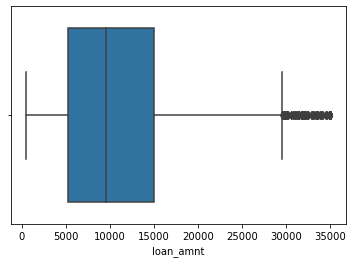

In [53]:
sns.boxplot(loan_df.loan_amnt)

<AxesSubplot:xlabel='funded_amnt'>

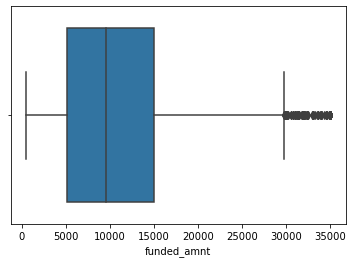

In [54]:
sns.boxplot(loan_df.funded_amnt)

<AxesSubplot:xlabel='funded_amnt_inv'>

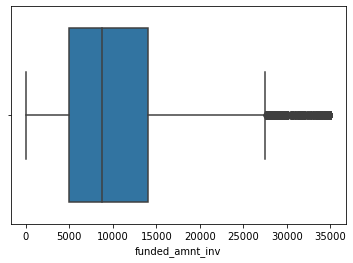

In [55]:
sns.boxplot(loan_df.funded_amnt_inv)

<AxesSubplot:xlabel='dti'>

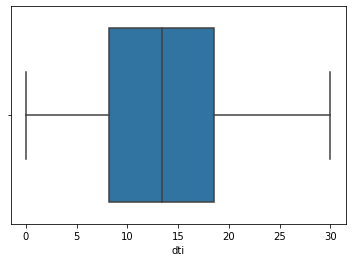

In [56]:
sns.boxplot(loan_df.dti)

<AxesSubplot:xlabel='int_rate'>

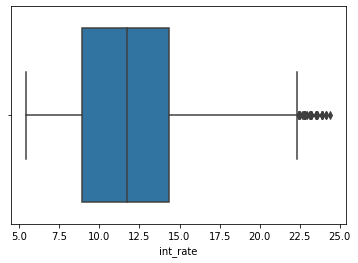

In [57]:
sns.boxplot(loan_df.int_rate)

In [58]:
## Though there are some outliers in the above columns, distribution is continuous and hence outlier treatment  is not reqyured

<AxesSubplot:xlabel='annual_inc'>

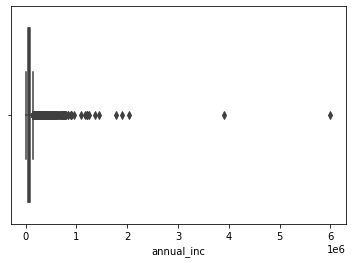

In [59]:
sns.boxplot(loan_df.annual_inc)

#### annual_inc has outliers

In [60]:
# Remove Outliers quantile .99 from Annual Income

In [61]:
loan_df = loan_df[loan_df['annual_inc'] < loan_df['annual_inc'].quantile(0.99)]
loan_df['annual_inc'].describe()  # After removing the outliers

count     38136.00
mean      65330.64
std       35104.71
min        4000.00
25%       40000.00
50%       58000.00
75%       80300.00
max      233004.00
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

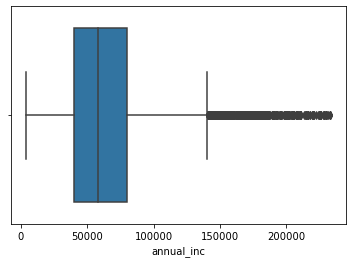

In [62]:
sns.boxplot(loan_df.annual_inc)

## Data Analysis and Visualisation

### Univariate Analysis 

In [63]:
# Analysing Loan status
(loan_df.loan_status.value_counts()/len(loan_df))*100

Fully Paid     85.40
Charged Off    14.60
Name: loan_status, dtype: float64

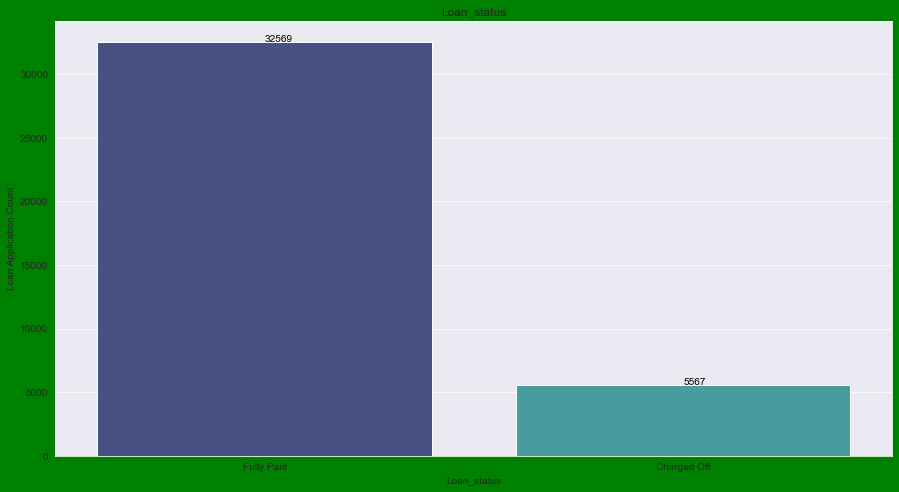

In [64]:
#Univariate Analysis of Unordered Categorical Variable - Loan Status
plt.figure(figsize= (15, 8) , facecolor = "g")
sns.set_style("darkgrid")
ax = sns.countplot(x = "loan_status" , data = loan_df , palette = "mako")
ax.set_title("Loan_status")
ax.set_xlabel("Loan_status")
ax.set_ylabel("Loan Application Count")
s = loan_df["loan_status"].value_counts()
for i , v in s.reset_index().iterrows():
    ax.text(i,v.loan_status+0.3 , v.loan_status , color = "k")

In [65]:
(loan_df.purpose.value_counts()/len(loan_df))*100

debt_consolidation    46.95
credit_card           13.07
other                 10.01
home_improvement       7.32
major_purchase         5.57
small_business         4.51
car                    3.90
wedding                2.40
medical                1.76
moving                 1.49
vacation               0.98
house                  0.94
educational            0.84
renewable_energy       0.26
Name: purpose, dtype: float64

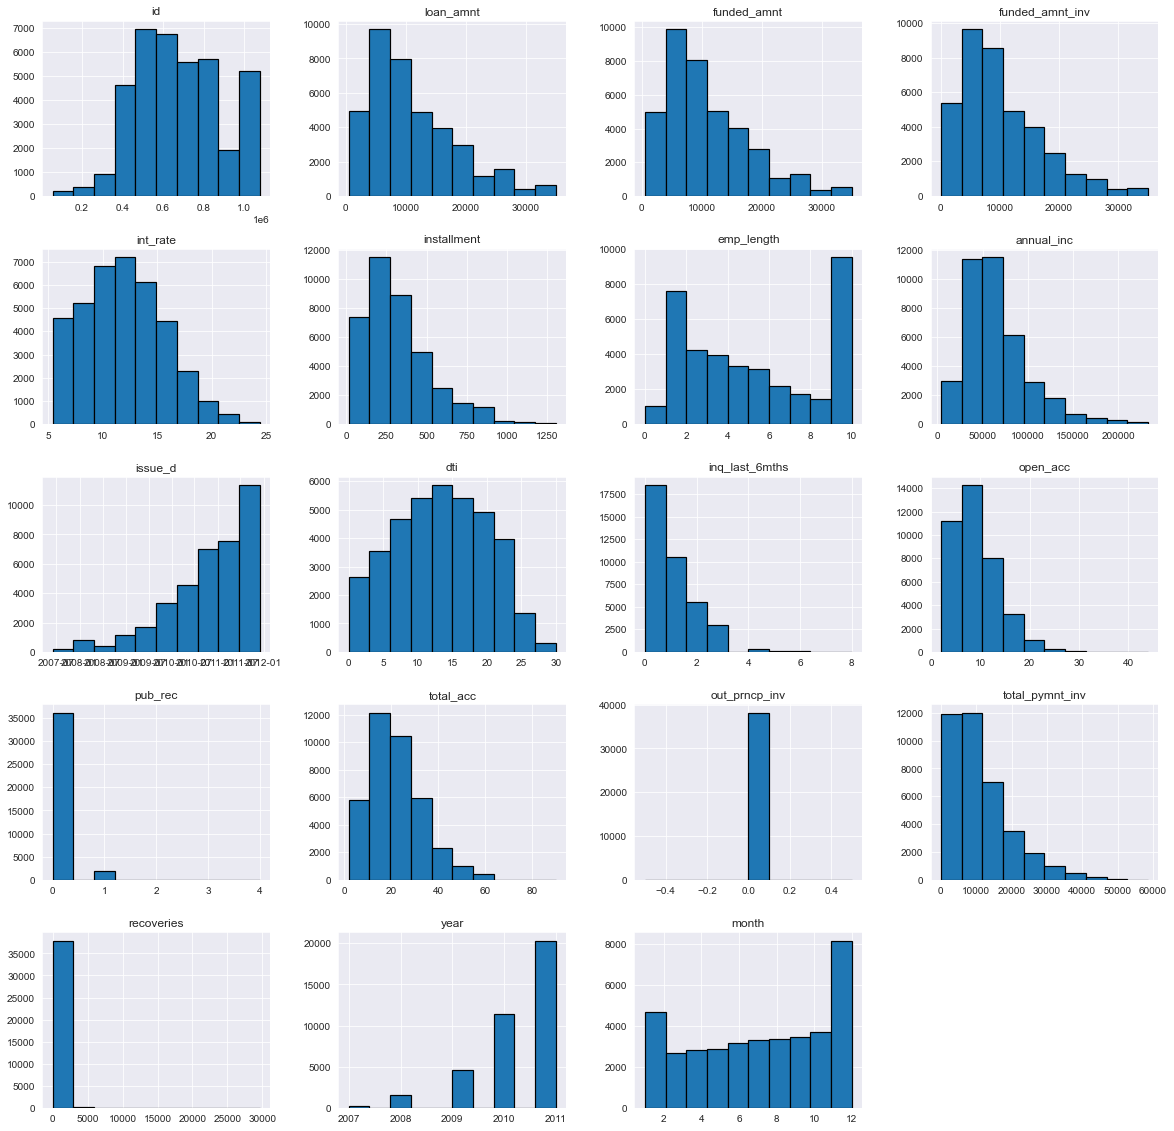

In [66]:
# Histogram to check distribution of numerical data
loan_df.hist(edgecolor='black',linewidth=1.2,figsize=(20,20))
plt.show()

In [67]:
loan_df['title'].value_counts()

Debt Consolidation          2066
Debt Consolidation Loan     1606
Personal Loan                634
Consolidation                484
debt consolidation           471
                            ... 
business inventory             1
Farrah's house                 1
Fencing Loan                   1
Debt Consolidatio/Payoff       1
JAL Loan                       1
Name: title, Length: 19098, dtype: int64

Text(0.5, 0, 'Funded Amount Invoice')

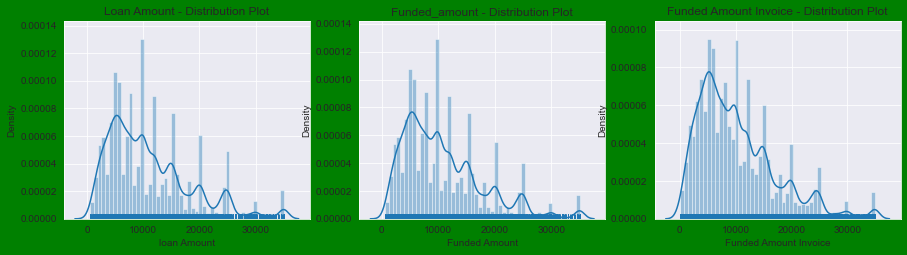

In [68]:
# Checking distribution of three amount fields using distribution plot 
plt.figure(figsize=(15,8),facecolor='g')
sns.set_style("darkgrid")
#subplot 1
plt.subplot(2,3,1)
ax = sns.distplot(loan_df['loan_amnt'] , rug = True)
ax.set_title('Loan Amount - Distribution Plot')
ax.set_xlabel("loan Amount")
#subplot 2
plt.subplot(2,3,2)
ax = sns.distplot(loan_df['funded_amnt'] , rug = True)
ax.set_title("Funded_amount - Distribution Plot")
ax.set_xlabel("Funded Amount")
#subplot 3
plt.subplot(2,3,3)
ax = sns.distplot(loan_df['funded_amnt_inv'] , rug = True)
ax.set_title("Funded Amount Invoice - Distribution Plot")
ax.set_xlabel("Funded Amount Invoice" )

### Observations: 
- Distribution of amounts for all three looks very much similar.
- so we will only work on loan amount column for the rest of the analysis 

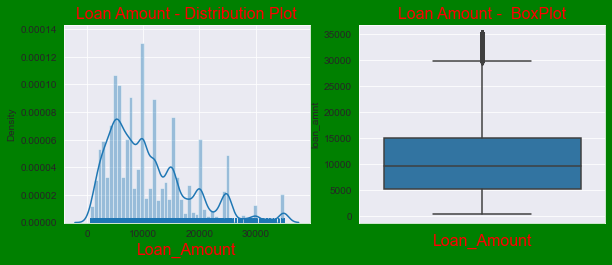

In [69]:
#Univariate Analysis on loan amount - Quantitative Variables
plt.figure(figsize = (15,8) , facecolor = "g")
sns.set_style("darkgrid")
#subplot 1
plt.subplot(2,3,1)
ax = sns.distplot(loan_df["loan_amnt"] , rug = True)
ax.set_title("Loan Amount - Distribution Plot" , fontsize = 16 , color = "r")
ax.set_xlabel("Loan_Amount" , fontsize = 16 , color = "r")
#subplot 2
plt.subplot(2,3,2)
ax = sns.boxplot(y = loan_df["loan_amnt"])
ax.set_title("Loan Amount -  BoxPlot" , fontsize = 16 , color = "r")
ax.set_xlabel("Loan_Amount" , fontsize = 16 , color = "r")
plt.show()

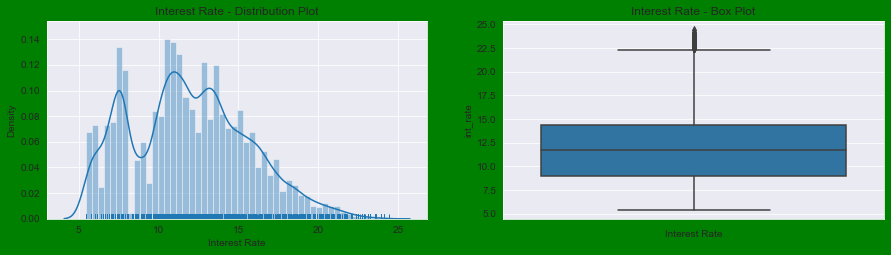

In [70]:
# Univariate analysis on Interest Rate - Quantitative Variables
plt.figure(figsize= (15,8) , facecolor = "g")
sns.set_style('darkgrid')
#subplot 1 
plt.subplot(2,2,1)
ax = sns.distplot(loan_df["int_rate"] , rug = True)
ax.set_title("Interest Rate - Distribution Plot")
ax.set_xlabel("Interest Rate")
# subplot 1
plt.subplot(2,2,2)
ax = sns.boxplot(y = loan_df["int_rate"])
ax.set_title("Interest Rate - Box Plot")
ax.set_xlabel("Interest Rate")
plt.show()

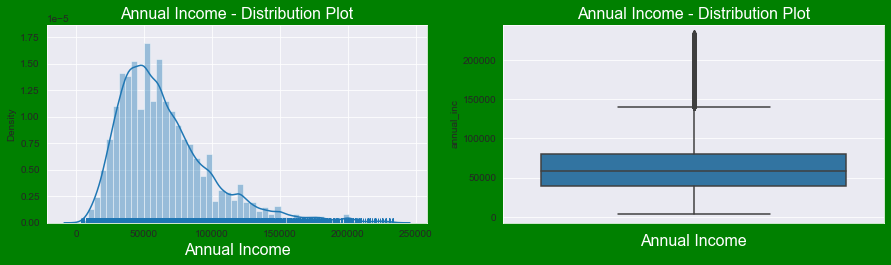

In [71]:
# Univariate Analysis on Annual Income - Quantitative variables
plt.figure(figsize = (15,8) , facecolor = "g")
sns.set_style("darkgrid")
# subplot 1 
plt.subplot(2,2,1)
ax = sns.distplot(loan_df["annual_inc"] , rug = True)
ax.set_title("Annual Income - Distribution Plot" , fontsize = 16 , color = "w")
ax.set_xlabel("Annual Income" , fontsize = 16 , color = "w")
# subplot 2 
plt.subplot(2,2,2)
ax = sns.boxplot(y = loan_df["annual_inc"])
ax.set_title("Annual Income - Distribution Plot" , fontsize = 16 , color = "w")
ax.set_xlabel("Annual Income" , fontsize = 16 , color = "w")
plt.show()

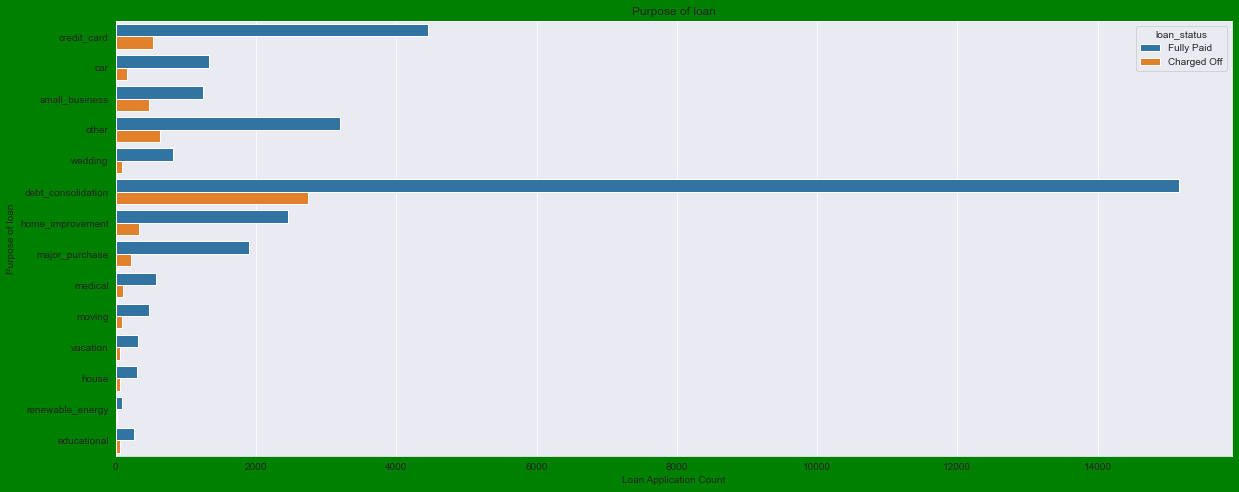

In [72]:
# Univariate Analysis of Unordered Categorical Variables - Purpose of loan 
plt.figure(figsize= (20, 8) , facecolor = "g")
sns.set_style("darkgrid")
ax = sns.countplot(y = "purpose" , data = loan_df , hue = "loan_status" )
ax.set_title("Purpose of loan")
ax.set_ylabel("Purpose of loan")
ax.set_xlabel("Loan Application Count")
plt.show()


### Observations 
- Above we can see that most of the purpose of debt consolidation & paying credit card bill.
- Number of charged off also are too high for these loans

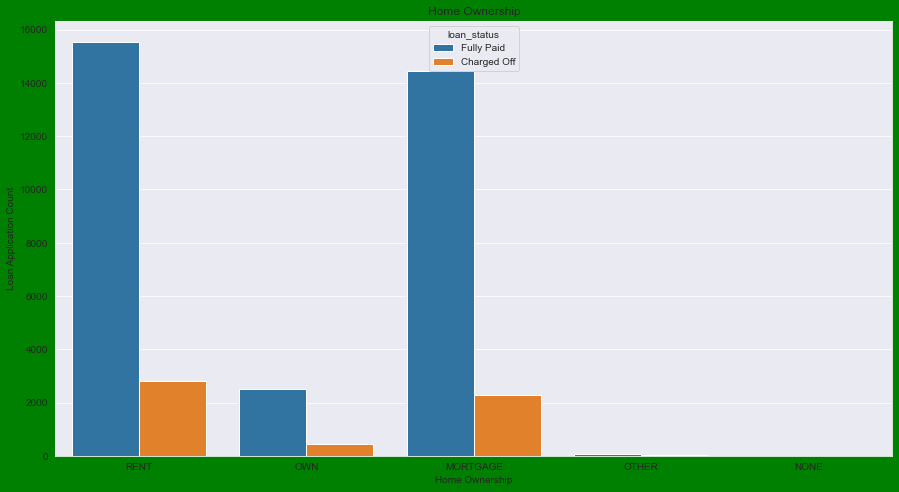

In [73]:
# univariate analysis on home Ownership 

plt.figure(figsize = (15,8) , facecolor = "g")
sns.set_style("darkgrid")
ax = sns.countplot(x = "home_ownership" , data = loan_df , hue = "loan_status")
ax.set_title("Home Ownership")
ax.set_xlabel("Home Ownership")
ax.set_ylabel("Loan Application Count")
plt.show()

#### Observation:
- from the above chart, we can see that most of them are living in rent & mortgage house 

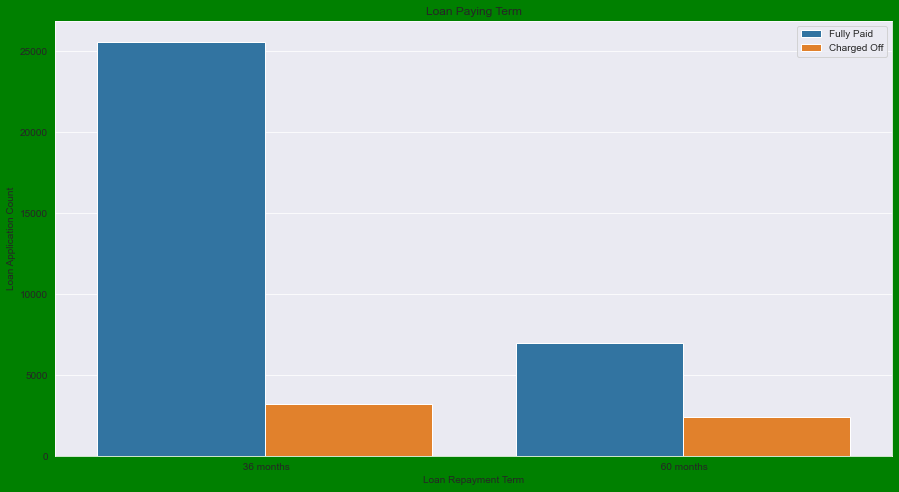

In [74]:
# Univariate Analysis  on ordered categorical variable - Loan Paying Term

plt.figure(figsize = (15,8) , facecolor = 'g')
ax = sns.countplot(x = 'term' , data = loan_df , hue = "loan_status")
ax.set_title("Loan Paying Term")
ax.set_xlabel("Loan Repayment Term")
ax.set_ylabel("Loan Application Count")
ax.legend(bbox_to_anchor= (1,1))
plt.show()

In [75]:
loan_df.term.value_counts()

 36 months    28768
 60 months     9368
Name: term, dtype: int64

In [76]:
loan_df[loan_df.term == ' 36 months'].loan_status.value_counts()

Fully Paid     25581
Charged Off     3187
Name: loan_status, dtype: int64

In [77]:
loan_df[loan_df.term == ' 60 months'].loan_status.value_counts()

Fully Paid     6988
Charged Off    2380
Name: loan_status, dtype: int64

In [78]:
# for 5 year team, % charge off
2380/(2380+6988)

0.25405636208368915

In [79]:
# for 3 year team, % charge off
3187/(3187+25581)

0.11078281423804227

#### Observation
- For loans with 5 year repayment term, the default percent is 25%. 
- for 3 year loan repayment term, the default is only for 11% of the cases. 
- Therefore, loan repayment is an important factor

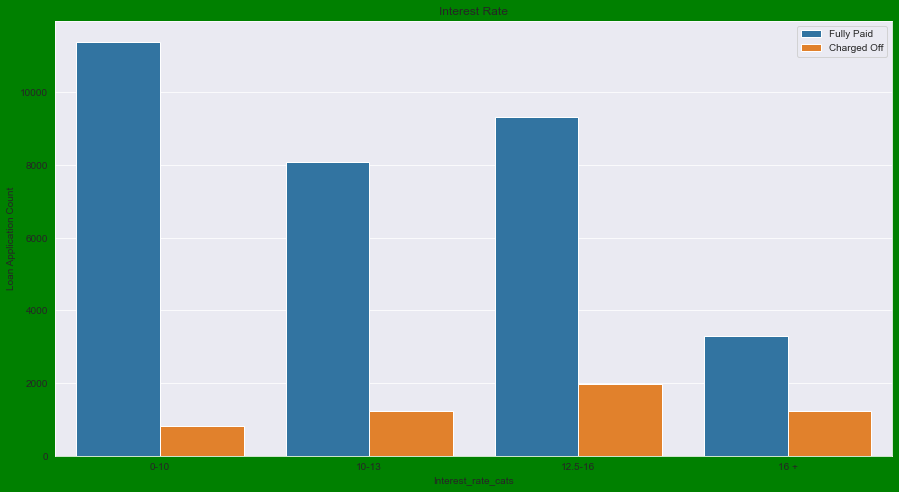

In [80]:
# Univariate Analysis  on ordered categorical variable - Interest Rate

plt.figure(figsize = (15,8) , facecolor = 'g')
ax = sns.countplot(x = 'int_rate_cats' , data = loan_df , hue = "loan_status")
ax.set_title("Interest Rate")
ax.set_xlabel("Interest_rate_cats")
ax.set_ylabel("Loan Application Count")
ax.legend(bbox_to_anchor= (1,1))
plt.show()

#### Observation
- Higher the rate of interest, higher the chance of default

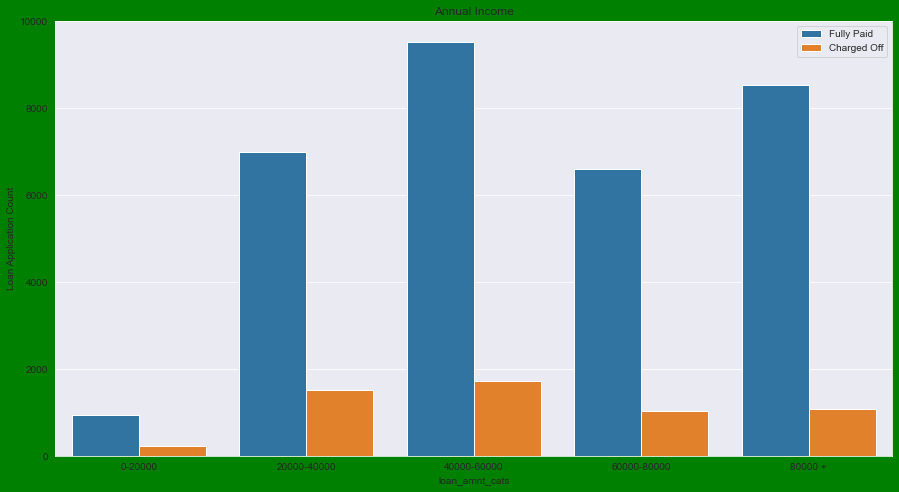

In [81]:
# Univariate Analysis  on ordered categorical variable - Annual income

plt.figure(figsize = (15,8) , facecolor = 'g')
ax = sns.countplot(x = 'annual_inc_cats' , data = loan_df , hue = "loan_status")
ax.set_title("Annual Income")
ax.set_xlabel("loan_amnt_cats")
ax.set_ylabel("Loan Application Count")
ax.legend(bbox_to_anchor= (1,1))
plt.show()

#### Observation
- Higher the income, less the chance of default

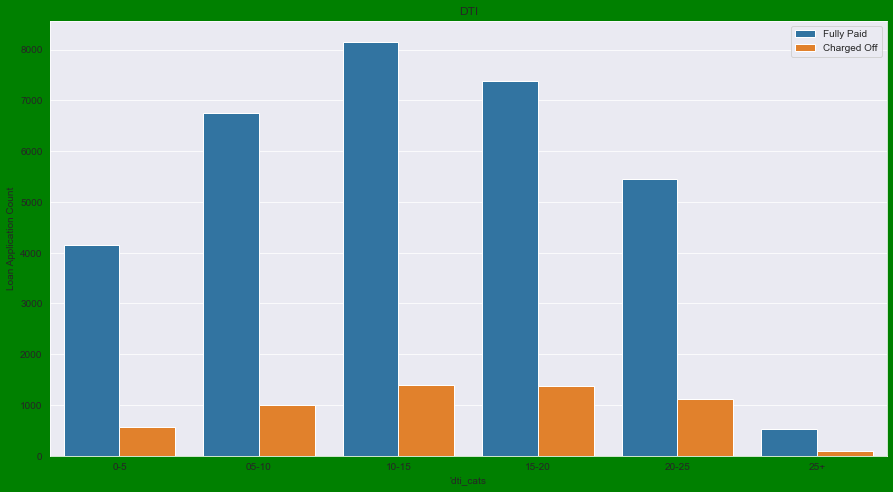

In [82]:
# Univariate Analysis  on ordered categorical variable - DTI

plt.figure(figsize = (15,8) , facecolor = 'g')
ax = sns.countplot(x = 'dti_cats' , data = loan_df , hue = "loan_status")
ax.set_title("DTI")
ax.set_xlabel("'dti_cats")
ax.set_ylabel("Loan Application Count")
ax.legend(bbox_to_anchor= (1,1))
plt.show()

#### Observation
- high DTI leads to high % of charge off

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

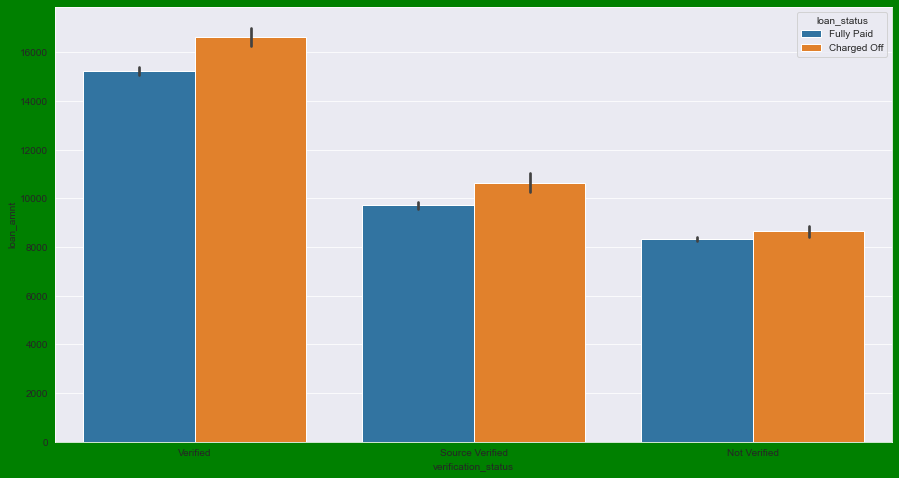

In [87]:
plt.figure(figsize = (15,8) , facecolor = 'g')
sns.barplot(data =loan_df,y='loan_amnt', x='verification_status', hue ='loan_status')

<AxesSubplot:xlabel='count', ylabel='purpose'>

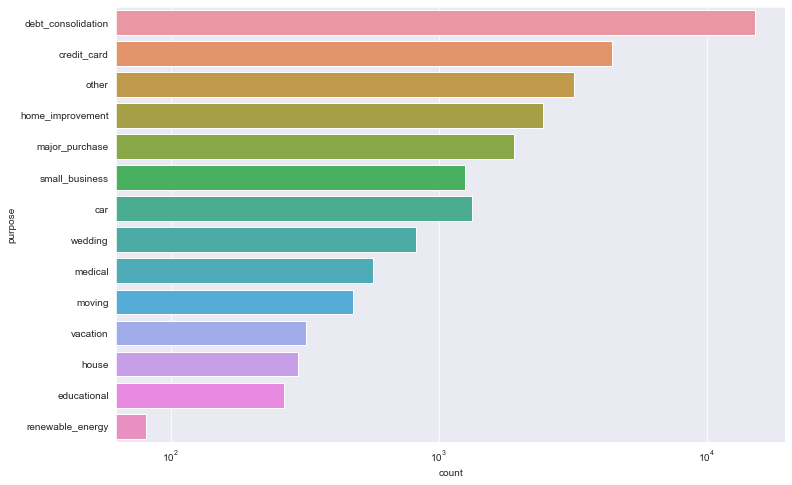

In [73]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Fully Paid'], order = loan_df.purpose.value_counts().index)

<AxesSubplot:xlabel='count', ylabel='purpose'>

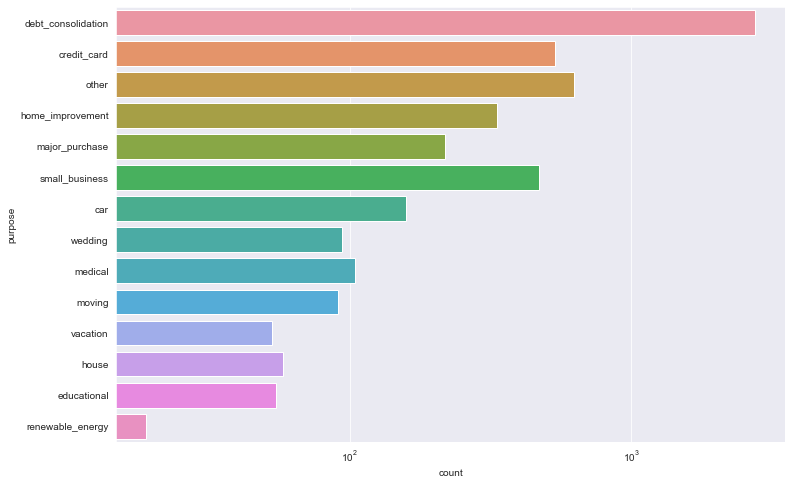

In [74]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'], order = loan_df.purpose.value_counts().index)

### Bivariate Analysis 

In [75]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
loan_df['loan_status_num'] = loan_df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [76]:
loan_correlation = loan_df.corr()
loan_correlation

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,out_prncp_inv,total_pymnt_inv,recoveries,year,month,loan_status_num
id,1.00,0.12,0.13,0.23,0.05,0.07,0.09,0.03,0.09,-0.04,0.02,-0.02,0.04,NaN,0.19,0.04,0.85,0.39,0.04
loan_amnt,0.12,1.00,0.98,0.94,0.30,0.93,0.16,0.41,0.07,0.01,0.17,-0.05,0.25,NaN,0.85,0.14,0.11,0.05,0.06
funded_amnt,0.13,0.98,1.00,0.96,0.30,0.96,0.16,0.41,0.07,0.01,0.17,-0.05,0.24,NaN,0.86,0.14,0.12,0.04,0.06
funded_amnt_inv,0.23,0.94,0.96,1.00,0.30,0.90,0.16,0.39,0.08,-0.01,0.16,-0.05,0.24,NaN,0.91,0.13,0.25,0.07,0.04
int_rate,0.05,0.30,0.30,0.30,1.00,0.28,0.01,0.07,0.11,0.13,0.00,0.10,-0.05,NaN,0.28,0.13,0.04,0.03,0.21
installment,0.07,0.93,0.96,0.90,0.28,1.00,0.13,0.41,0.06,0.01,0.17,-0.04,0.22,NaN,0.82,0.12,0.05,0.03,0.03
emp_length,0.09,0.16,0.16,0.16,0.01,0.13,1.00,0.19,0.05,0.01,0.10,0.05,0.20,NaN,0.15,0.03,0.09,0.02,0.01
annual_inc,0.03,0.41,0.41,0.39,0.07,0.41,0.19,1.00,-0.11,0.04,0.26,-0.02,0.38,NaN,0.38,0.04,0.03,0.02,-0.06
dti,0.09,0.07,0.07,0.08,0.11,0.06,0.05,-0.11,1.00,0.00,0.29,-0.01,0.24,NaN,0.07,0.03,0.09,0.01,0.04
inq_last_6mths,-0.04,0.01,0.01,-0.01,0.13,0.01,0.01,0.04,0.00,1.00,0.09,0.02,0.11,NaN,-0.02,0.02,-0.06,0.01,0.07


In [77]:
loan_df.out_prncp_inv.value_counts()

0.00    38136
Name: out_prncp_inv, dtype: int64

In [78]:
loan_df.drop(columns = ['out_prncp_inv'], inplace = True)

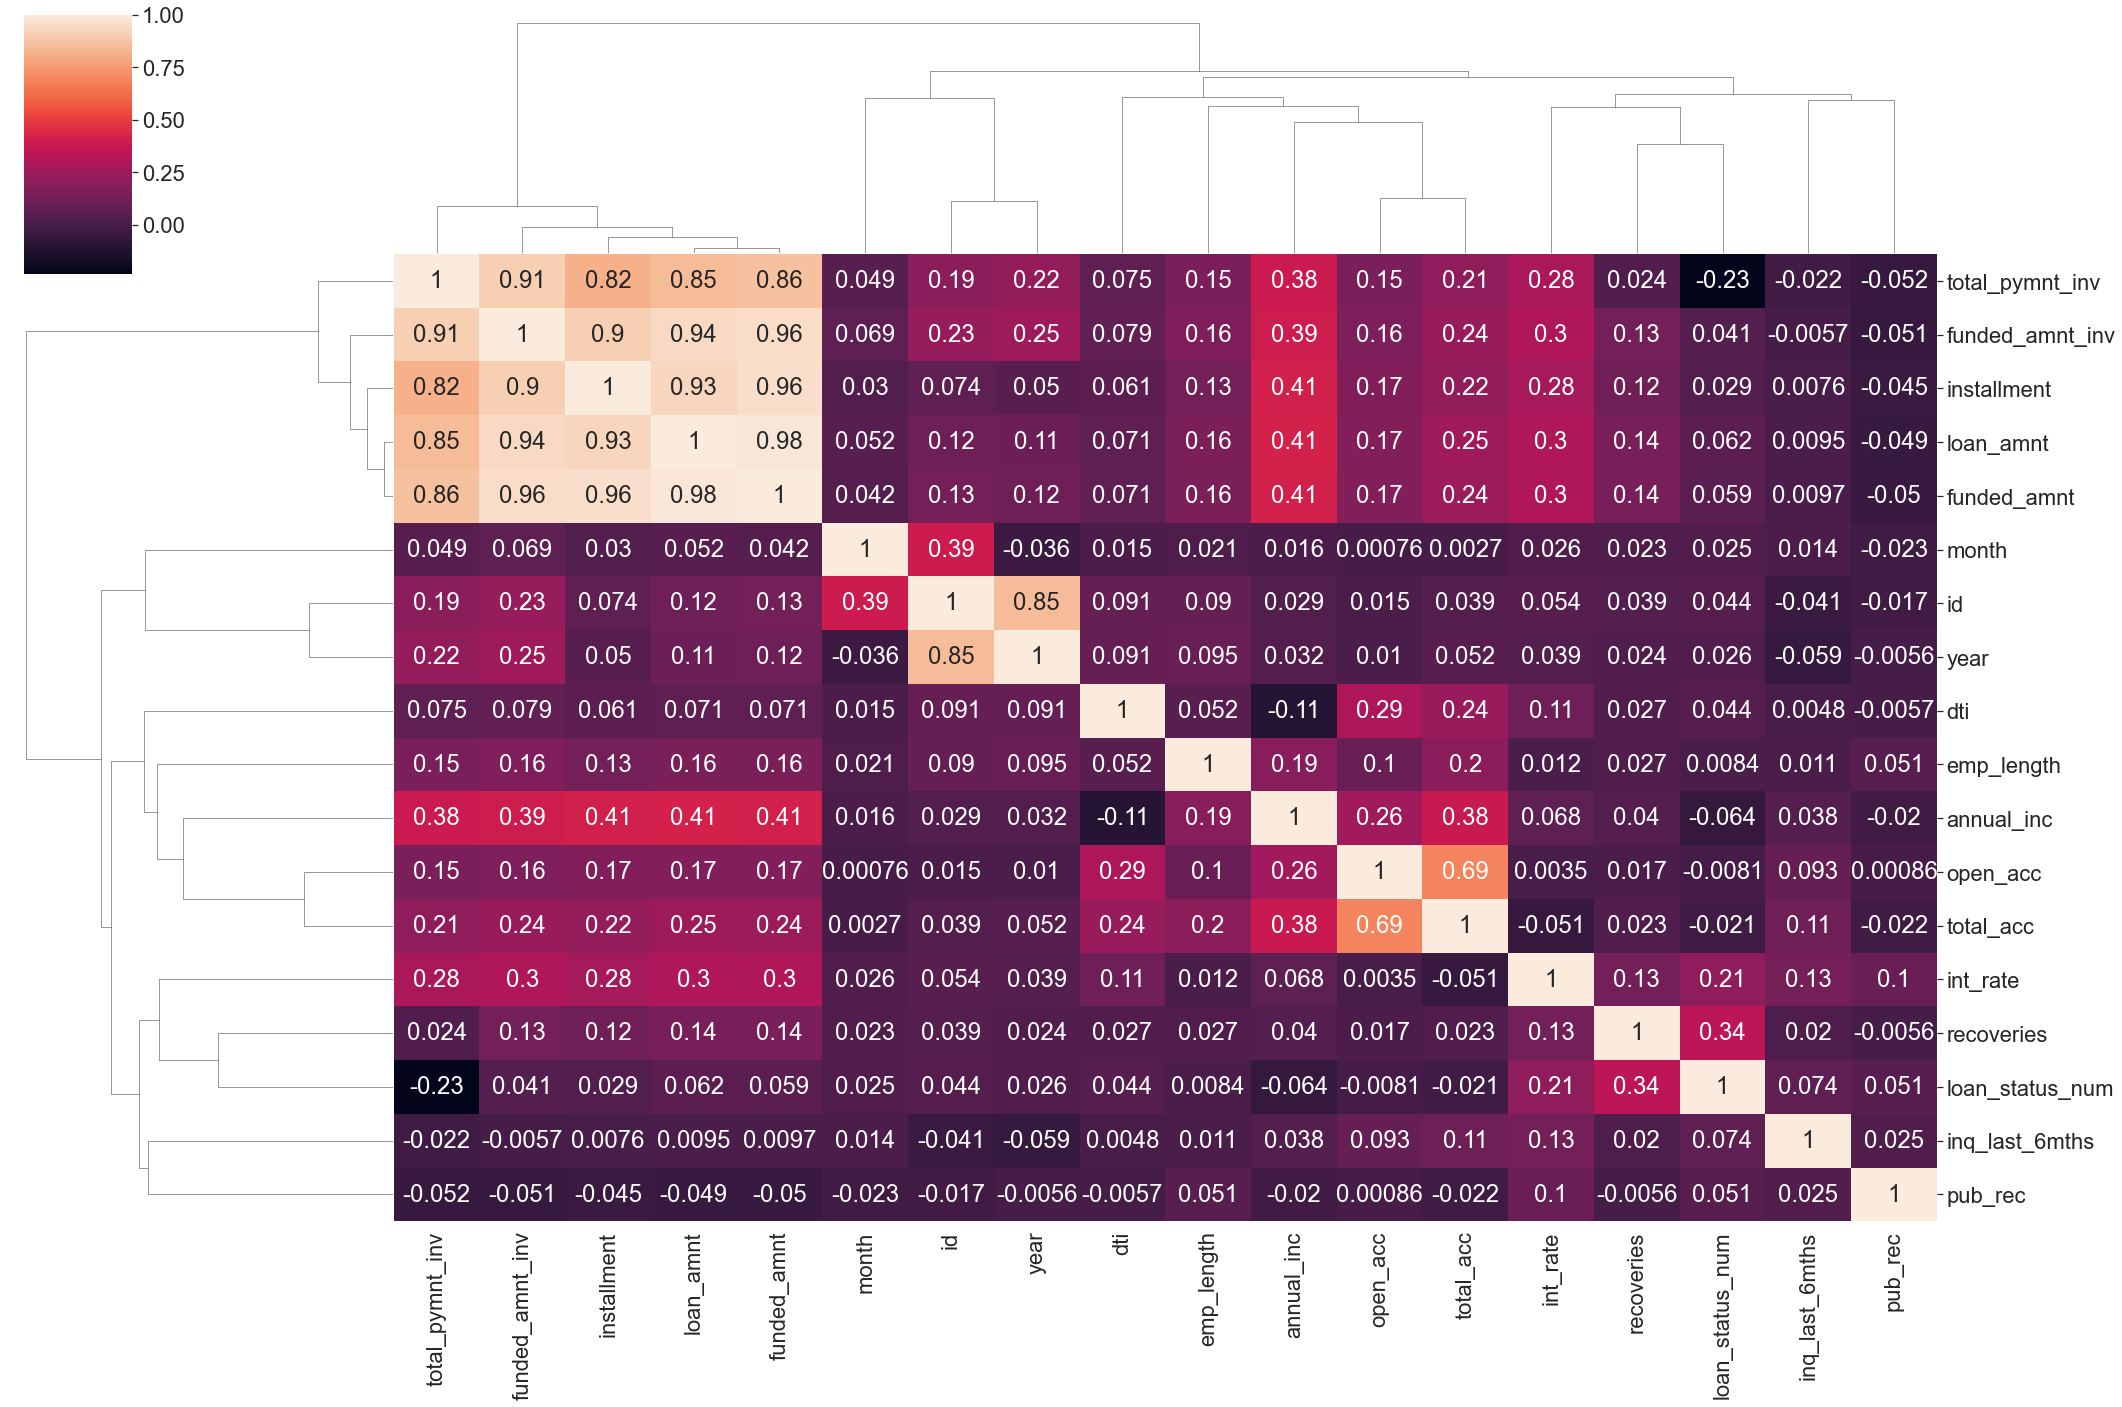

In [79]:
loan_correlation = loan_df.corr()
sns.set(font_scale=2)
sns.clustermap(loan_correlation,annot=True, figsize=(30, 20))
plt.show()

#### Observation
- Total_payment_inv, funded_amnt_inv, installment, loan_amnt, funded amnt show high level of correlation with each other


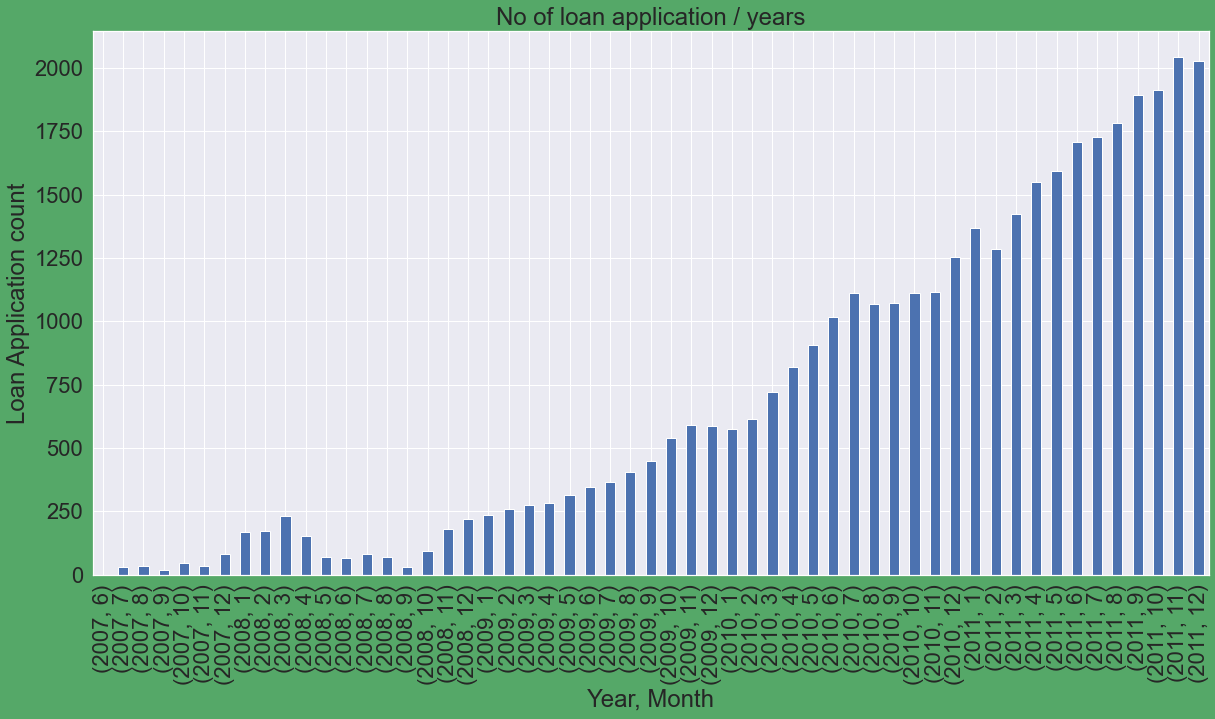

In [83]:
# Derived Column - Ordered Categorical Variable 
# lets take a look into the number of loans which were approved every year/months 
# Lets use the derived the column year to check the pattern of loan issued over the years
plt.figure(figsize = (20,10) , facecolor = "g")
loan_df.groupby(['year' , 'month']).id.count().plot(kind='bar')
plt.ylabel("Loan Application count")
plt.xlabel("Year, Month")
plt.title("No of loan application / years")
plt.show()


#### Observations:
- Looking at the above graph, we can see that loan issued are increasing every passing years
- There is a dip in loan application rate in year 2008, may be due to recession 

In [84]:
# Bivariate Analysis on annual income against chargedoff_proportion

inc_range_vs_loan = loan_df.groupby(["annual_inc_cats" , 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan["Total"] = inc_range_vs_loan["Charged Off"]  + inc_range_vs_loan["Fully Paid"]
inc_range_vs_loan["Chargedoff_Proportion"] = inc_range_vs_loan["Charged Off"]/inc_range_vs_loan["Total"]
inc_range_vs_loan.sort_values('Chargedoff_Proportion' , ascending = False)

loan_status,annual_inc_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,233,933,1166,0.20
1,20000-40000,1507,6991,8498,0.18
2,40000-60000,1725,9528,11253,0.15
3,60000-80000,1023,6596,7619,0.13
4,80000 +,1079,8521,9600,0.11


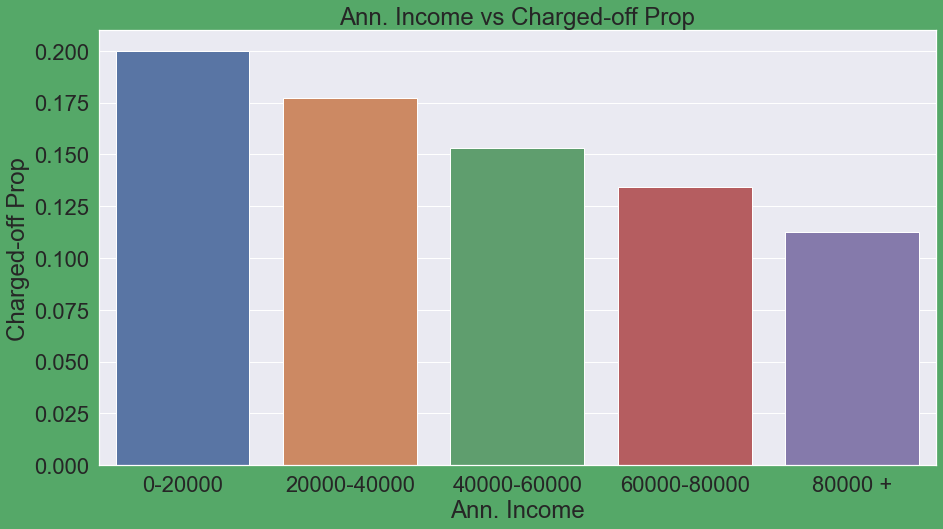

In [85]:
fig, ax1 = plt.subplots(figsize=(15, 8) , facecolor = 'g')
ax1.set_title('Ann. Income vs Charged-off Prop')
ax1=sns.barplot(x="annual_inc_cats" , y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel("Charged-off Prop")
ax1.set_xlabel("Ann. Income")
plt.show()

#### Observations:
- Annual Income range of 0-20000 has a high chance of charged off.
- one more observation as annual income increases charged off proportion decreases

In [86]:
# Bivariate analysis on purpose of loan against charged off proportion 
purpose_vs_loan = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+purpose_vs_loan["Fully Paid"]
purpose_vs_loan['Chargedoff_proportion'] = purpose_vs_loan['Charged Off']/purpose_vs_loan['Total']
purpose_vs_loan.sort_values("Chargedoff_proportion" , ascending = False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_proportion
11,small_business,471,1250,1721,0.27
10,renewable_energy,19,81,100,0.19
3,educational,55,265,320,0.17
9,other,625,3192,3817,0.16
5,house,58,299,357,0.16
8,moving,91,477,568,0.16
7,medical,105,567,672,0.16
2,debt_consolidation,2747,15156,17903,0.15
12,vacation,53,321,374,0.14
4,home_improvement,335,2457,2792,0.12


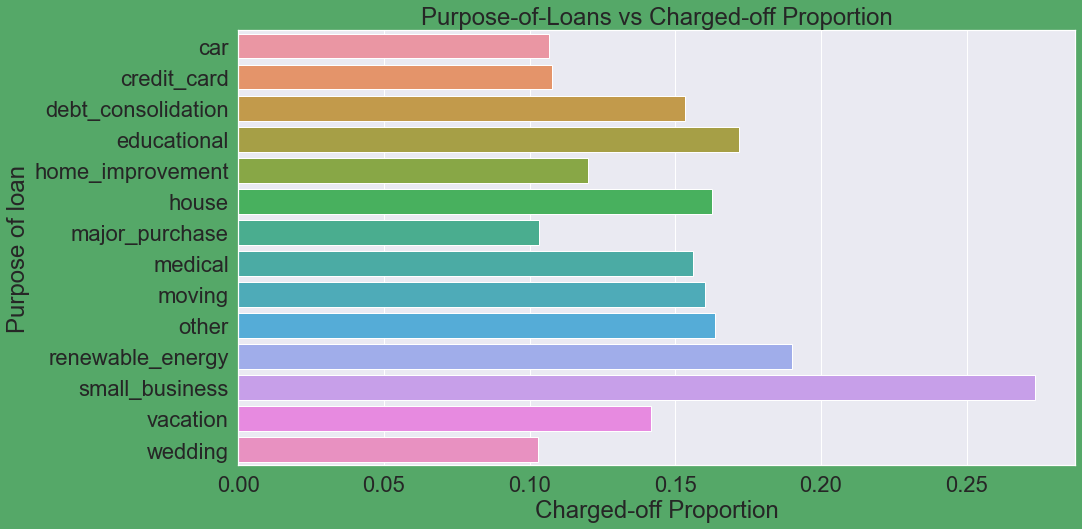

In [87]:
#lets visualize this above data 
fig , ax1= plt.subplots(figsize=(15,8) , facecolor = "g")
ax1.set_title("Purpose-of-Loans vs Charged-off Proportion")
ax1 = sns.barplot(y='purpose',x='Chargedoff_proportion' , data=purpose_vs_loan)
ax1.set_xlabel("Charged-off Proportion")
ax1.set_ylabel("Purpose of loan")
plt.show()


#### Observations
 - small business has highest charged off proportion

In [88]:
# bivariate analysis on grade against chargedoff_proportion
grade_vs_loan = loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,97,190,287,0.34
5,F,309,639,948,0.33
4,E,700,1899,2599,0.27
3,D,1109,3903,5012,0.22
2,C,1338,6400,7738,0.17
1,B,1413,10163,11576,0.12
0,A,601,9375,9976,0.06


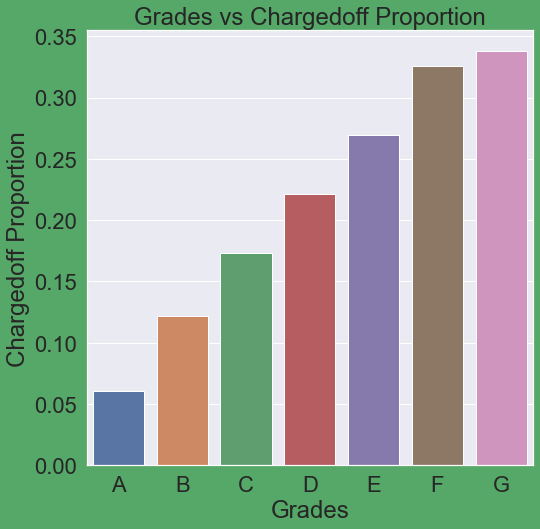

In [89]:
#Lets visualize it 
fig , ax1 = plt.subplots(figsize=(8,8) , facecolor = 'g')
ax1.set_title('Grades vs Chargedoff Proportion')
ax1= sns.barplot(x="grade" , y= "Chargedoff_Proportion" , data= grade_vs_loan)
ax1.set_xlabel('Grades')
ax1.set_ylabel('Chargedoff Proportion')
plt.show()

#### Obervation
 - The chance of increase of charge off is toward A-->G

In [90]:
# Bivariate Analysis on sub grade against chargedoff_proportion
grade_vs_loan = loan_df.groupby(['sub_grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] +  grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,sub_grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
29,F5,53,55,108,0.49
32,G3,19,25,44,0.43
34,G5,10,18,28,0.36
31,G2,26,47,73,0.36
28,F4,51,94,145,0.35
30,G1,30,61,91,0.33
23,E4,126,293,419,0.30
27,F3,50,118,168,0.30
25,F1,88,210,298,0.30
26,F2,67,162,229,0.29


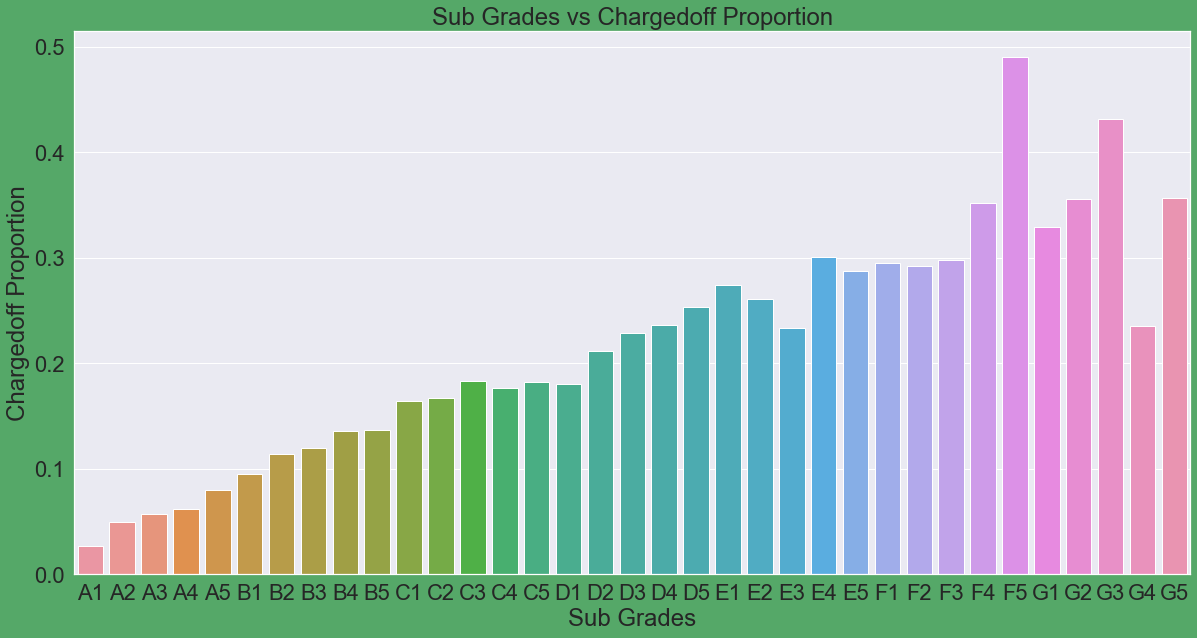

In [91]:
#Visualization
fig , ax1 = plt.subplots(figsize=(20, 10), facecolor='g')
ax1.set_title("Sub Grades vs Chargedoff Proportion")
ax1 = sns.barplot(x= 'sub_grade' , y= 'Chargedoff_Proportion' , data = grade_vs_loan)
ax1.set_xlabel('Sub Grades')
ax1.set_ylabel('Chargedoff Proportion')
plt.show()


#### Observations
- sub grades of A has very less chances of charged off.
- sub grades of F & G are having very high chances of charged off

In [92]:
# Bivariate Analysis on interest rate against Chargedoff_proportion 
interest_vs_loan = loan_df.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] +  interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,int_rate_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1244,3308,4552,0.27
2,12.5-16,1989,9332,11321,0.18
1,10-13,1221,8078,9299,0.13
0,0-10,825,11400,12225,0.07


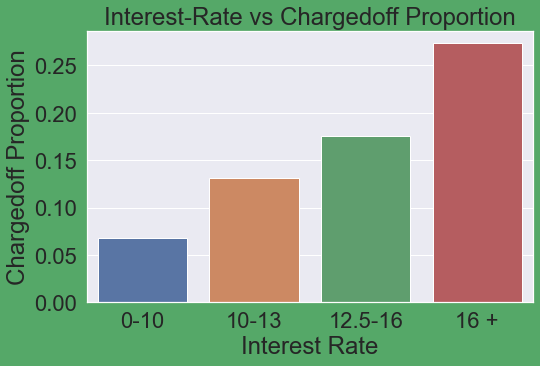

In [93]:
#Visualization 
fig, ax1 = plt.subplots(figsize=(8, 5),facecolor='g')
ax1.set_title('Interest-Rate vs Chargedoff Proportion')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate')
ax1.set_ylabel('Chargedoff Proportion')
plt.show()

#### Observations
- The rate of interest less than 10% has very less chance of charged off
- There is a good chance of charged off as compared to other category interest rate 


In [94]:
# Bivariate Analysis - employment length against Chargedoff_Proportion

emplen_vs_loan = loan_df.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0,226,799,1025,0.22
10,10,1315,7036,8351,0.16
7,7,262,1432,1694,0.15
5,5,454,2709,3163,0.14
8,8,202,1215,1417,0.14
1,1,1083,6520,7603,0.14
6,6,303,1845,2148,0.14
3,3,551,3421,3972,0.14
4,4,454,2855,3309,0.14
2,2,560,3679,4239,0.13


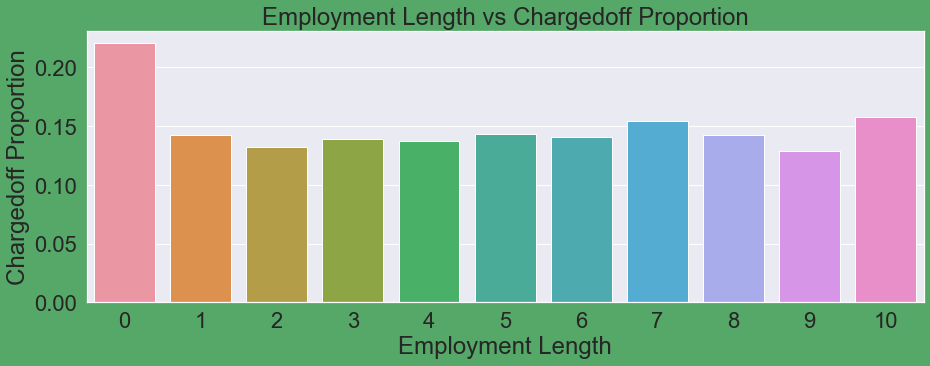

In [95]:
#Visualization 
fig, ax1 = plt.subplots(figsize=(15, 5),facecolor='g')
ax1.set_title('Employment Length vs Chargedoff Proportion')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length')
ax1.set_ylabel('Chargedoff Proportion')
plt.show()

#### Observations 
- High range of chargedoff in the employees who has 0 level experience to less than 1 year experience 

In [96]:
# State vs Chargedoff_Proportion
state_vs_loan = loan_df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] +  state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.00,2.00,5.00,0.60
32,NV,107.00,367.00,474.00,0.23
40,SD,12.00,49.00,61.00,0.20
0,AK,14.00,63.00,77.00,0.18
9,FL,496.00,2252.00,2748.00,0.18
24,MO,113.00,551.00,664.00,0.17
11,HI,28.00,137.00,165.00,0.17
31,NM,30.00,149.00,179.00,0.17
13,ID,1.00,5.00,6.00,0.17
4,CA,1114.00,5757.00,6871.00,0.16


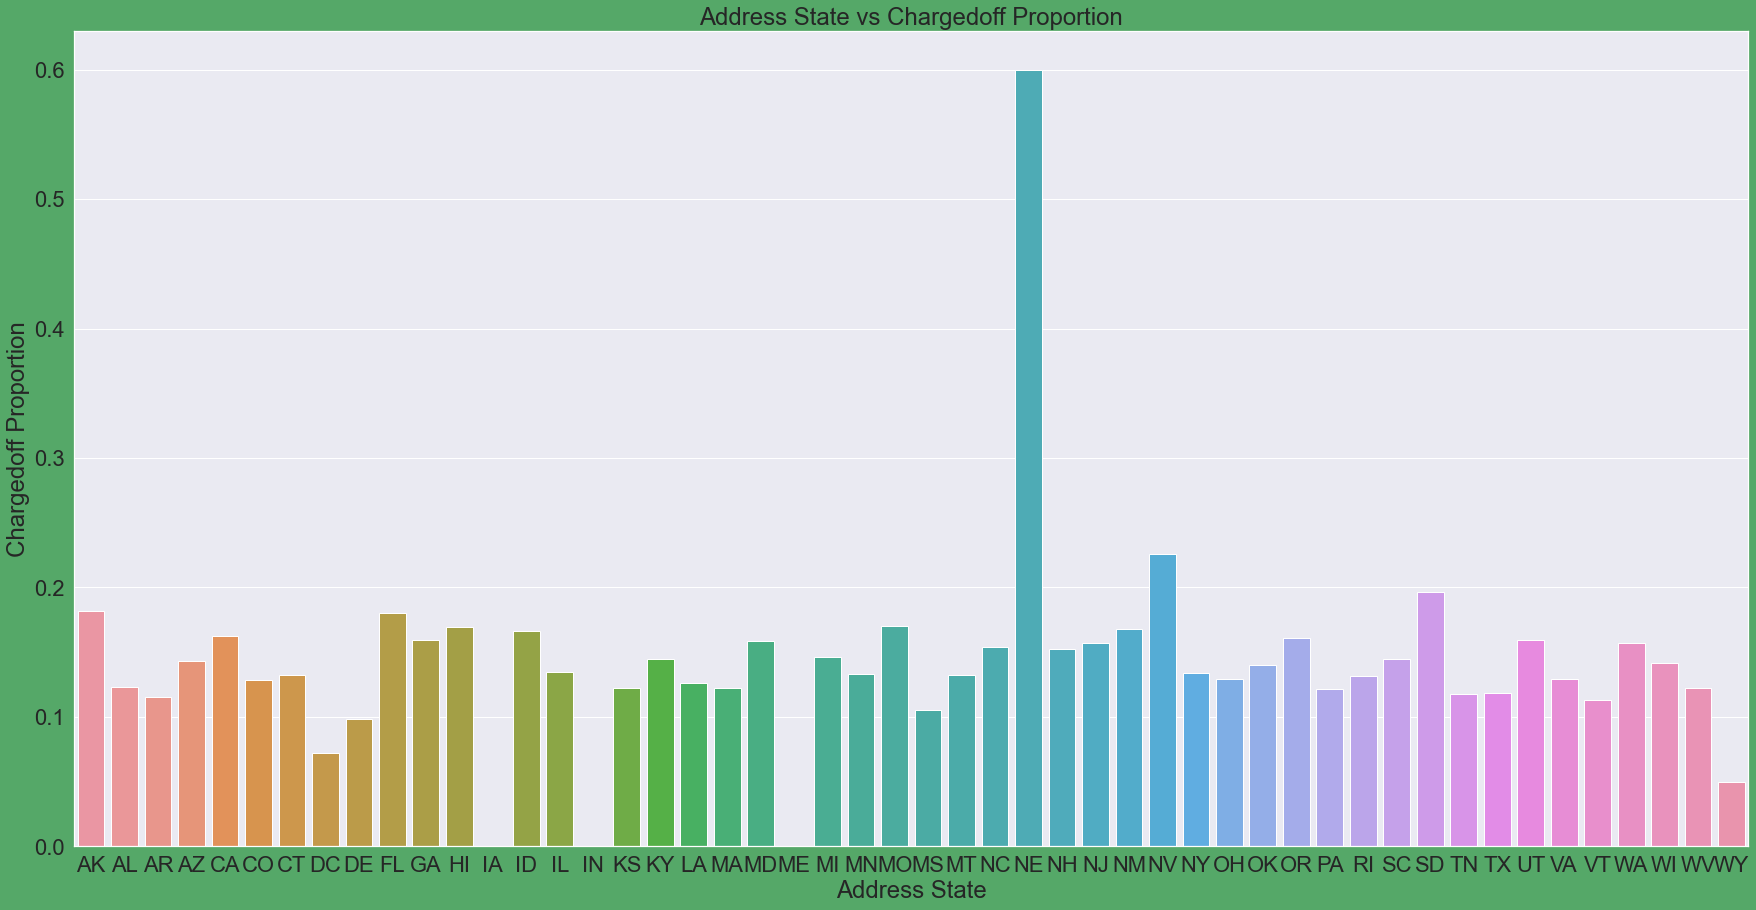

In [97]:
fig, ax1 = plt.subplots(figsize=(30, 15),facecolor='g')
ax1.set_title('Address State vs Chargedoff Proportion')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=state_vs_loan)
ax1.set_xlabel('Address State')
ax1.set_ylabel('Chargedoff Proportion')
plt.show()

#### Observation 
- NE has a high range of charged off proportion 

In [98]:
# verification_status vs Chargedoff_Proportion
verfy_vs_loan = loan_df.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,Verified,2026,9993,12019,0.17
1,Source Verified,1419,8125,9544,0.15
0,Not Verified,2122,14451,16573,0.13


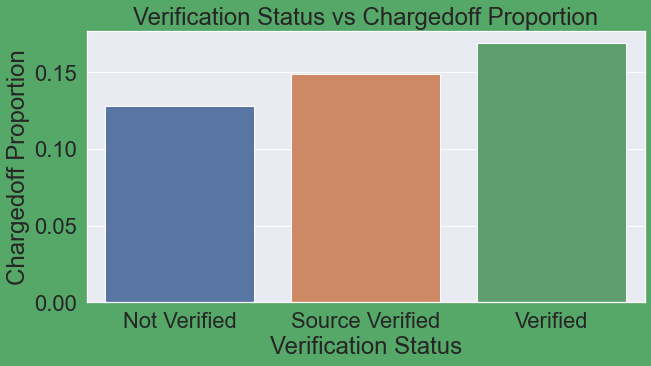

In [99]:
#Visualization 
fig, ax1 = plt.subplots(figsize=(10, 5),facecolor='g')
ax1.set_title('Verification Status vs Chargedoff Proportion')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status')
ax1.set_ylabel('Chargedoff Proportion')
plt.show()

#### observation
- The charged off proportion starts from 0.12. There is not much difference in it but the highest charged off is in verified 

In [100]:
#pub_rec_bankruptcies vs Chargedoff_Proportion

bankruptcies_vs_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,2.00,2,3,5,0.40
1,1.00,365,1267,1632,0.22
3,Not Available,116,571,687,0.17
0,0.00,5084,30728,35812,0.14


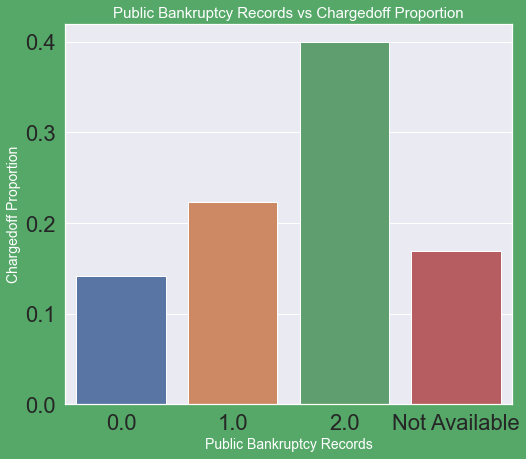

In [101]:
# Visualise
fig, ax1 = plt.subplots(figsize=(8, 7),facecolor='g')
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()


#### Observations
- Higher bankruptcy records, higher the chance of default
- In the Not Known section, we don't have much information about the users

In [102]:
#Derogatory Public Record vs Chargedoff_Proportion

bankruptcies_vs_loan = loan_df.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,1,454.00,1549.00,2003.00,0.23
2,2,10.00,37.00,47.00,0.21
0,0,5103.00,30974.00,36077.00,0.14
3,3,0.00,7.00,7.00,0.00
4,4,0.00,2.00,2.00,0.00


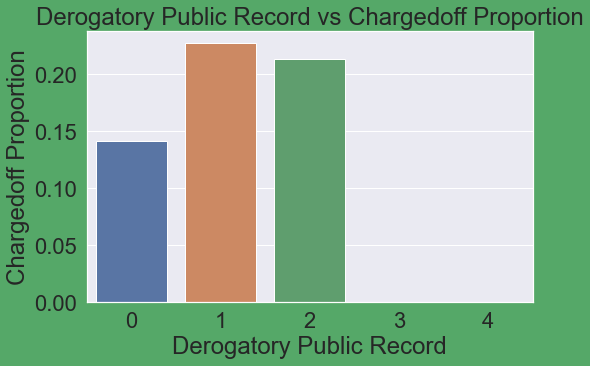

In [103]:
#Visualization 
fig, ax1 = plt.subplots(figsize=(8, 5),facecolor='g')
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Derogatory Public Record')
ax1.set_ylabel('Chargedoff Proportion')
plt.show()

#### Observations:
- Derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
- Pub_rec count for 3 & 4 has less number 
- Pub_rec count for 1 & 2 has higher number of charged off 


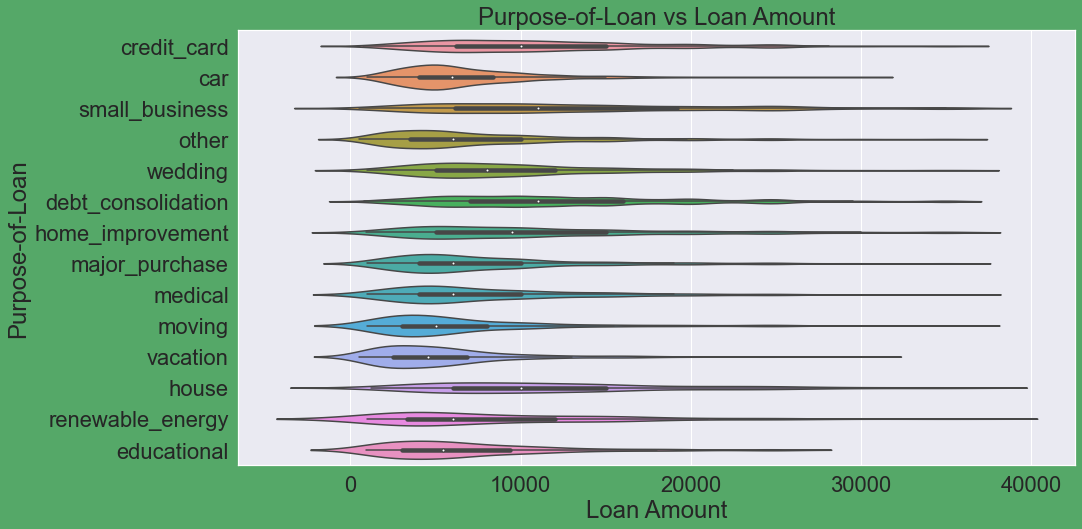

In [104]:
#Purpose of loan vs Loan amount - Violin plot
plt.figure(figsize=(15,8),facecolor='g')
ax=sns.violinplot(y='purpose', x='loan_amnt', data =loan_df)
ax.set_title('Purpose-of-Loan vs Loan Amount')
ax.set_ylabel('Purpose-of-Loan')
ax.set_xlabel('Loan Amount')
plt.show()

#### Observation 
- For small business, the loan, debt consolidations and credit card are somewhat evenly distributed 

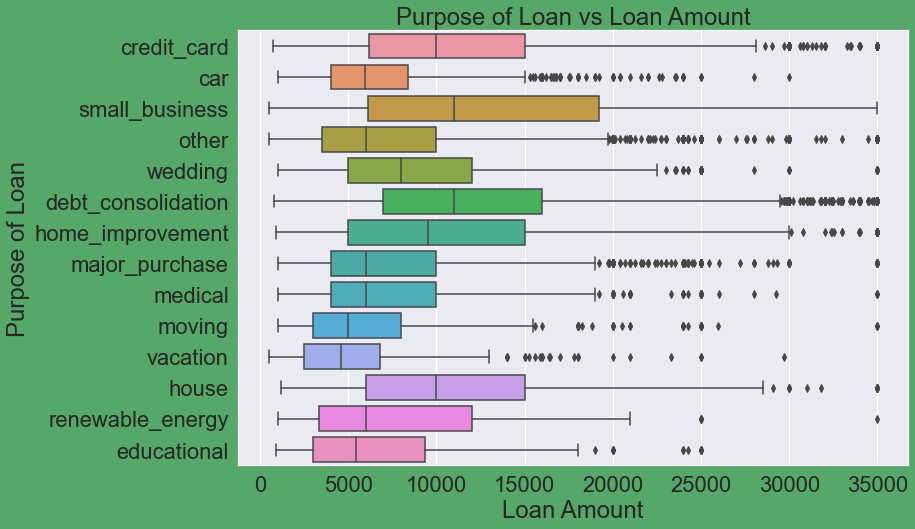

In [105]:
#Purpose of loan vs Loan amount -Box Plot

plt.figure(figsize=(12,8),facecolor='g')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loan_df)
ax.set_title('Purpose of Loan vs Loan Amount')
ax.set_ylabel('Purpose of Loan')
ax.set_xlabel('Loan Amount')
plt.show()


#### Observation
- small_business have a higher median , 75th percentile of loan amount compared to others 

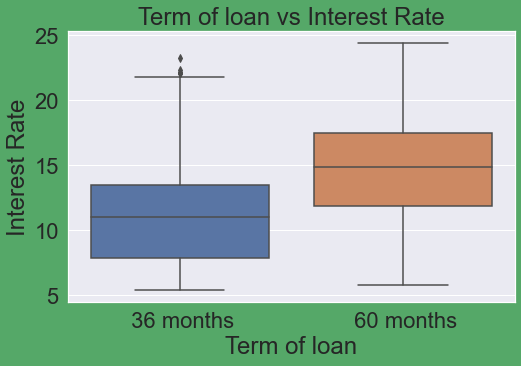

In [106]:
#Term of loan vs Interest Rate - Box Plot

plt.figure(figsize=(8,5),facecolor='g')
ax = sns.boxplot(y='int_rate', x='term', data =loan_df)
ax.set_title('Term of loan vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Term of loan')
plt.show()


#### Observation
- This clearly proves that average interest rate is higher for 60 months loan term 

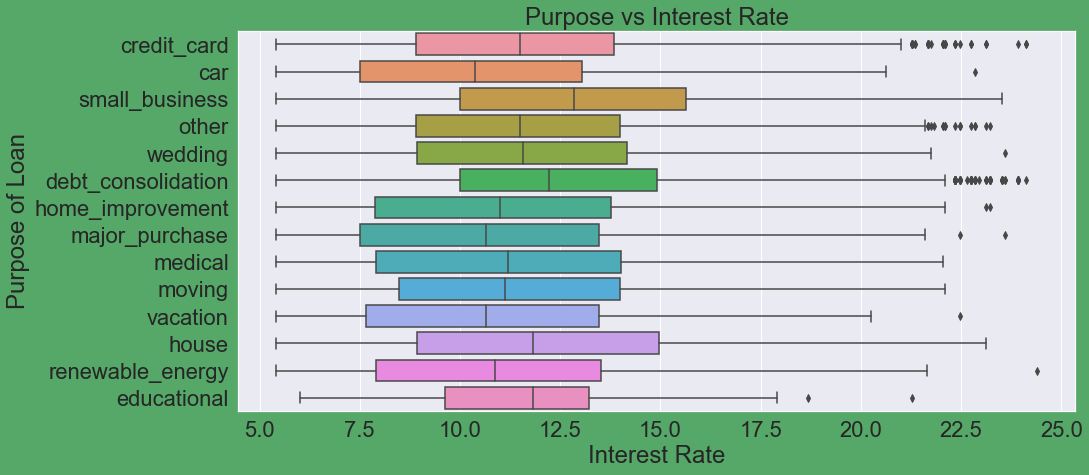

In [107]:
#Purpose vs Interest Rate - Box Plot

plt.figure(figsize=(15,7),facecolor='g')
ax = sns.boxplot(x='int_rate', y='purpose', data =loan_df)
ax.set_title('Purpose vs Interest Rate')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Purpose of Loan')
plt.show()

#### Observation 
- The average interest rate for small business are high compared to other 

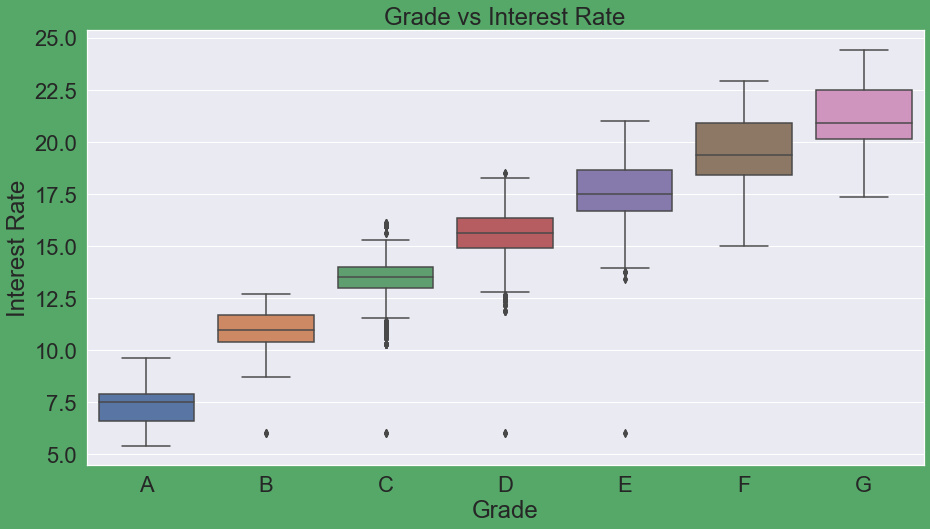

In [108]:
#Grade vs Interest Rate - Box Plot

plt.figure(figsize=(15,8),facecolor='g')
ax = sns.boxplot(y='int_rate', x='grade', data =loan_df , order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Grade')
plt.show()

#### Observation
-  interest rate increases from A-->G

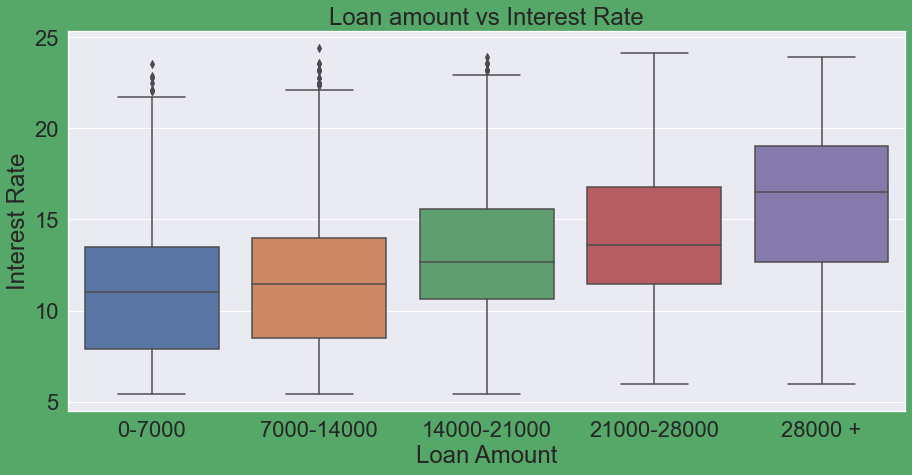

In [109]:
#Loan Amount vs Interest Rate - Box Plot

plt.figure(figsize=(15,7),facecolor='g')
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =loan_df)
ax.set_title('Loan amount vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Loan Amount')
plt.show()


#### Observation 
- Here, we can see that interest rate is directly proportional to loan amount i.e. Higher the loan amount, higher will be the interest rate 

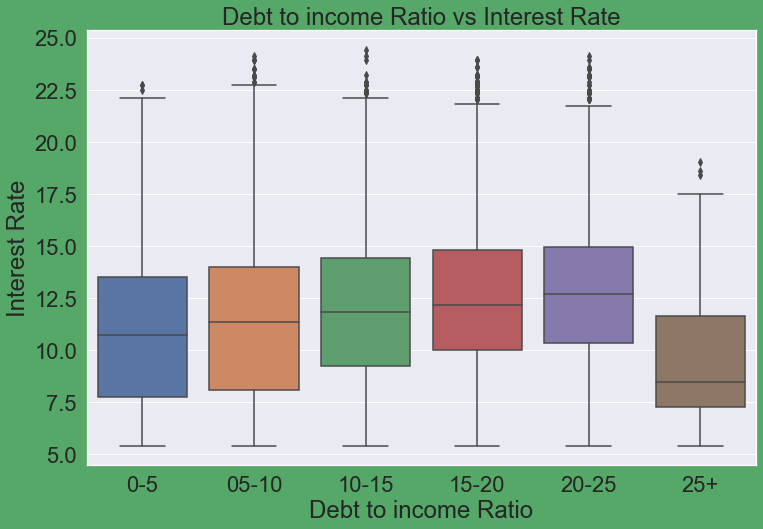

In [110]:
#dti vs Interest Rate - Box Plot

plt.figure(figsize=(12,8),facecolor='g')
ax = sns.boxplot(y='int_rate', x='dti_cats', data =loan_df)
ax.set_title('Debt to income Ratio vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Debt to income Ratio')
plt.show()

#### Observation 
- There is not that match difference in value in the above graph. But there is gradual increase from left to right 

In [111]:
#Recoveries vs Annual income - Box Plot

loan_df['recoveries']=pd.to_numeric(loan_df['recoveries'],errors='coerce')
loan_df_rec=loan_df[loan_df['recoveries'] > 0.00]
 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 



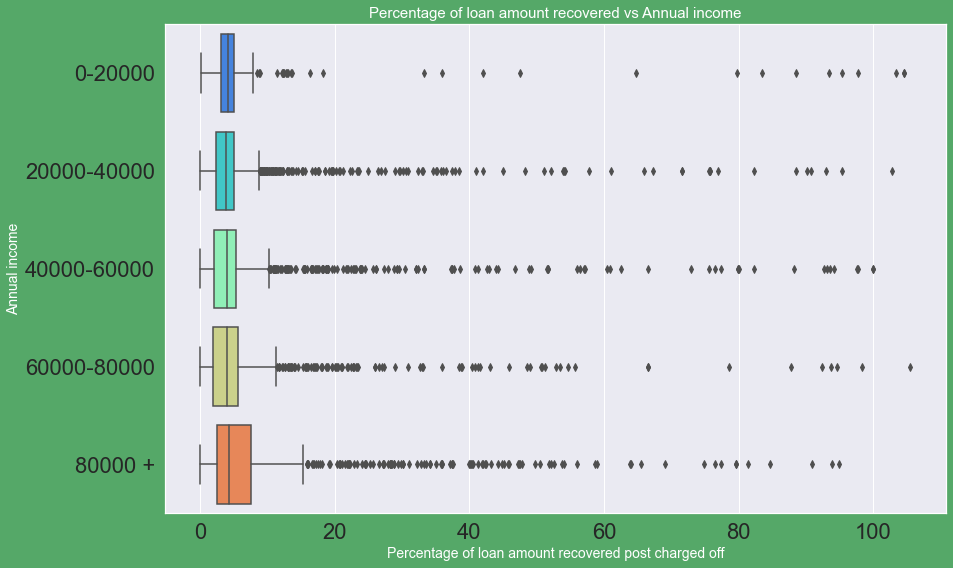

In [112]:
#Visualization
plt.figure(figsize=(14,9),facecolor='g')
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=loan_df_rec,palette='rainbow')
ax.set_title('Percentage of loan amount recovered vs Annual income',fontsize=15,color = 'w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=14,color = 'w')
plt.show()


#### Observations-
- The percentage of recovery totally dependent of annual income. The annual income of 80000+ has higher percentage of recovery compared to the others

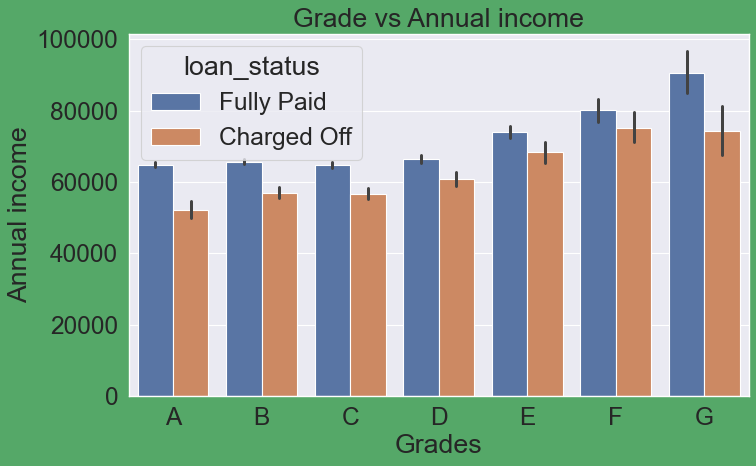

In [114]:
# BarPlot - annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80, facecolor='g', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan_df, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income')
ax.set_ylabel('Annual income')
ax.set_xlabel('Grades')
plt.show()

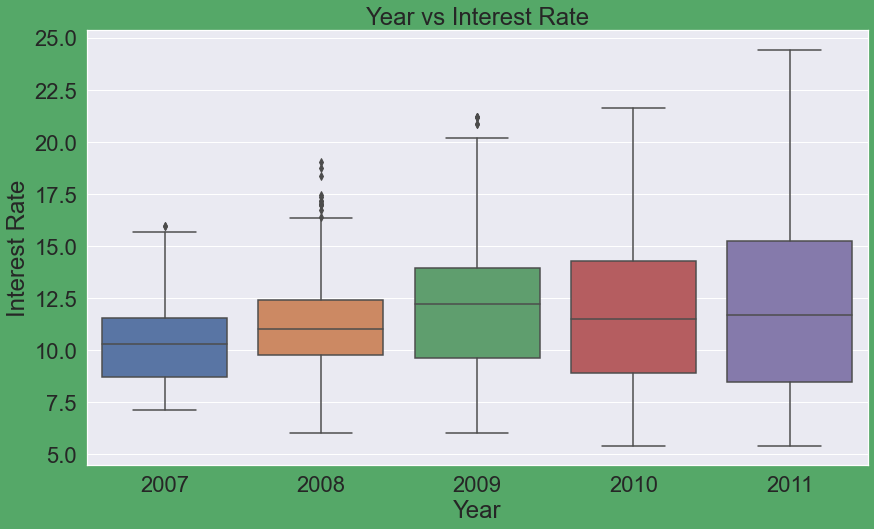

In [115]:
# Year vs Interest Rate - Box Plot

plt.figure(figsize=(14,8),facecolor='g')
ax = sns.boxplot(y='int_rate', x='year', data =loan_df)
ax.set_title('Year vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Year')
plt.show()

#### Observation 
- As increase in years, there is a small increase in interest rate

### CONCLUSION

The detailed data exploration has helped in understanding that there are a few factors which can help us in knowing whether the person will default or not. This can help the bank in knowing the right opportunities and drop the ones that are risky.

Following are few of the factors identified from the analysis that can help identify the people who have a higher chance of default:

Consumer Attributes
- Person living in Rented place or place that has been mortgaged have a higher chance of default as compared to someone who is staying in their own place
- Higher Income, less chances of defaulting. One additional point is that income range less than 20000 has the highest defaults as compared to other income groups
- Annual income greater than 80000 have a higher chance of loan recovery
- High Debt to Income Ratio leads to higher defaults
- If the employee experience is between 0 and 1, high chance of defaults
- State NE has a higher number of defaults as compared to other states
- Higher bankruptcy records, greater the chances of default
- Derogatory public records in the range from 0 to 3 have a high chance of default

Loan Attributes
- Purpose stated for the loan is ‘Debt Consolidation’, ‘Credit card’ or ‘Others’. Small business has the highest charged off percent
- Rate of interest in the range of 12.5 to 16% has higher defaults. ROI less than 10% has the lowest number of defaults
- Loans with higher terms have a higher default percent
- Defaults increases as the grade goes from A to G. Subgrade wise too this holds true
